# Project 1: Classification Analysis on Textual Data

Name: Vignesh Nagarajan \\
UID: 606185377


In [ ]:
%cd '/content/drive/MyDrive/219/Project1'

/content/drive/MyDrive/219/Project1


In [ ]:
!pip uninstall umap
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 5.9 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=29b4285ea37659e0bec819ec97873be70955137ee454357a1b5ac96d86e237bd
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


In [ ]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import re
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk import pos_tag
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn import svm
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, GridSearchCV
from scipy.stats import uniform
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
import warnings
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.pipeline import Pipeline
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

nltk.download('punkt')#, if you need "tokenizers/punkt/english.pickle", choose it
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')
from sklearn.base import BaseEstimator, TransformerMixin
from tqdm import tqdm
import umap.umap_ as umap

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Getting familiar with the dataset (Q1)

In [ ]:
df = pd.read_csv('Project1-ClassificationDataset.csv')
df.head()

,full_text,summary,keywords,publish_date,authors,url,leaf_label,root_label
0,'Personalize Your NBA App Experience for the '...,'Personalize Your NBA App Experience for the '...,"['original', 'content', 'live', 'slate', 'game...",NaN,['Official Release'],https://www.nba.com/news/nba-app-new-features-...,basketball,sports
1,'Mike Will attends the Pre-GRAMMY Gala and GRA...,'Mike WiLL Made-It has secured a partnership w...,"['lead', 'espn', 'nbas', 'madeit', 'nba', 'lat...",2023-10-18 16:22:29+00:00,['Marc Griffin'],https://www.vibe.com/news/entertainment/mike-w...,basketball,sports
2,'The Golden State Warriors are struggling to f...,'The Golden State Warriors are struggling to f...,"['insider', 'york', 'thing', 'nbc', 'tag', 'nb...",NaN,[],https://www.nbcnewyork.com/tag/featured-nba/,basketball,sports
3,"'On Nov. 28, the NBA and Nike will collaborate...","'On Nov. 28, the NBA and Nike will collaborate...","['watch', 'telecast', 'ultimate', 'membership'...",NaN,['Official Release'],https://www.nba.com/news/watch-nba-games-ultim...,basketball,sports
4,'The NBA announced additions and innovations t...,'The NBA announced additions and innovations t...,"['experience', 'bring', 'media', 'crennan', 'n...",2023-10-17 12:00:17+00:00,"['Chris Novak', 'About Chris Novak']",https://awfulannouncing.com/tech/nba-app-2023-...,basketball,sports


In [ ]:
no_of_rows = len(df)
no_of_cols = len(df.columns)
print("-------OVERVIEW--------\n")
print("Number of rows =  {}".format(no_of_rows))
print("Number of columns =  {}".format(no_of_cols))


-------OVERVIEW--------

Number of rows =  3476
Number of columns =  8


-------HISTOGRAMS--------



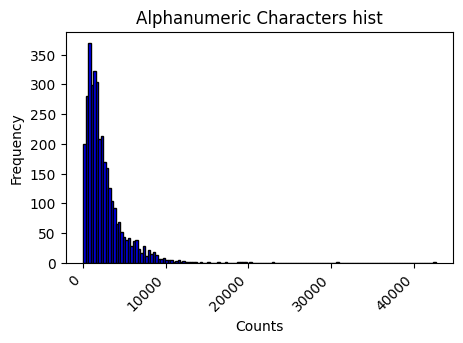

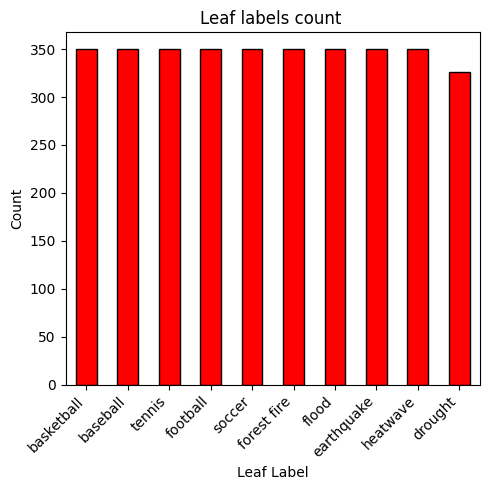

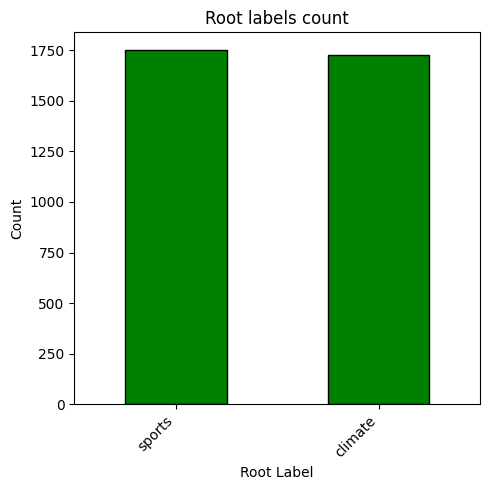

In [ ]:
print("-------HISTOGRAMS--------\n")
plt.figure(figsize = (5,3))
plt.xticks(rotation=45, ha='right')
full_text = df["full_text"]
alphanumeric_lengths = full_text.apply(lambda x: sum(c.isalnum() for c in str(x)))
plt.hist(alphanumeric_lengths, color='blue', bins='auto',edgecolor='black')
plt.title('Alphanumeric Characters hist')
plt.xlabel('Counts')
plt.ylabel('Frequency')
plt.show()

# Plot histogram for (b)
plt.figure(figsize = (5,5))
leaf_label_counts = df['leaf_label'].value_counts()
leaf_label_counts.plot(kind='bar', color='red', edgecolor='black')
plt.title('Leaf labels count ')
plt.xlabel('Leaf Label')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

# Plot histogram for (c)
plt.figure(figsize = (5,5))
root_label_counts = df['root_label'].value_counts()
root_label_counts.plot(kind='bar', color='green', edgecolor='black')
plt.title('Root labels count')
plt.xlabel('Root Label')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()



## ANSWER 1
As seen from the above analysis, the number of rows (samples) and columns (features) are present in the dataset

| Samples count      | Features (column) count |    
| :---        |    :----:   |   
| 3476      | 8       |

The histograms are as plotted above

# Binary Classification

## Train-Test Split (Q2)

In [ ]:
np.random.seed(42)
random.seed(42)
train, test = train_test_split(df[['full_text', 'root_label','keywords']], test_size=0.2)
print("Number of training samples = ",len(train))
print("Number of testing samples = ",len(test))


Number of training samples =  2780
Number of testing samples =  696


## ANSWER 2

| Train Samples count      | Test samples count |    
| :---        |    :----:   |   
| 2780      | 696       |


## Feature Extraction

In [ ]:
#Clean samples
def clean(text):
    text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    texter = re.sub(r"<br />", " ", text)
    texter = re.sub(r"&quot;", "\"",texter)
    texter = re.sub('&#39;', "\"", texter)
    texter = re.sub('\n', " ", texter)
    texter = re.sub(' u '," you ", texter)
    texter = re.sub('`',"", texter)
    texter = re.sub(' +', ' ', texter)
    texter = re.sub(r"(!)\1+", r"!", texter)
    texter = re.sub(r"(\?)\1+", r"?", texter)
    texter = re.sub('&amp;', 'and', texter)
    texter = re.sub('\r', " ",texter)
    texter = re.sub(r'\b\d+(?:\.\d+)?\b', "", texter)#removes digits
    texter = re.sub(r'[^\w\s]', "" ,texter) #removes punctuations


    clean = re.compile('<.*?>')
    texter = texter.encode('ascii', 'ignore').decode('ascii')
    texter = re.sub(clean, '', texter)
    if texter == "":
        texter = ""
    return texter

train["full_text"] = train["full_text"].map(clean)
test["full_text"]= test["full_text"].map(clean)

In [ ]:
wnl = nltk.wordnet.WordNetLemmatizer()
stop_words = stopwords.words("english")
def penn2morphy(penntag):
    """ Converts Penn Treebank tags to WordNet. """
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n'

###################  LEMMATIZER  ###################
def lemmatize_tokenizer(text):
    return [
        wnl.lemmatize(word.lower(), pos=penn2morphy(tag))
        for word, tag in pos_tag(nltk.word_tokenize(text))
        if word.lower() not in stop_words
    ]
#####################################################

################### STEMMER ###################
def stem_tokens(text):
      return [
        stemmer.stem(word.lower())
        for word in nltk.word_tokenize(text)
        if word.lower() not in stop_words]
#####################################################



def text_vectorization(train_text_data, test_text_data, min_df, max_df=1.0):
    doc_vectorizer = CountVectorizer(min_df=min_df,tokenizer=lemmatize_tokenizer)
    train_vectorized = doc_vectorizer.fit_transform(train_text_data)
    test_vectorized = doc_vectorizer.transform(test_text_data)
    tfidf_transformer = TfidfTransformer()
    tfidf_train = tfidf_transformer.fit_transform(train_vectorized)
    tfidf_test = tfidf_transformer.transform(test_vectorized)
    return tfidf_train, tfidf_test, doc_vectorizer


tfidf_train, tfidf_test, vectorizer = text_vectorization(train["full_text"],
                                                      test["full_text"],
                                                      min_df=3)

print("training set has size of ", tfidf_train.shape)
print("testing set has size of ", tfidf_test.shape)

training set has size of  (2780, 14124)
testing set has size of  (696, 14124)


## ANSWER 3
>  *(i) What are the pros and cons of lemmatization versus stemming? How do these processes affect the dictionary size?*

|                 | Lemmatization                                      | Stemming                                   |
|-----------------|----------------------------------------------------|--------------------------------------------|
| **Pros**        | 1. Contextual accuracy<br>2. Readability<br>3. Meaning preservation | 1. Speed<br>2. Reduced storage requirements |
| **Cons**        | 1. Computational Complexity<br>2. Resource-intensive             | 1. Lack of precision<br>2. Semantic loss    |

Regarding impact on dictionary size, lemmatization and stemming both decrease dictionary size. Lemmatization decreases the dictionary size since it reduces multiple inflected forms to a common lemma.
Stemming uses crude heuristic processes that chops off the ends of words that often includes the removal of derivational affixes hence decreasing dictionary size.

> *(ii) `min-df` means minimum document frequency. How does varying `min_df` change the TF-IDF matrix?*

`min_df` is used for removing terms that appear less frequently in documents. So increasing `min_df` would imply a harsher choice of vocabulary and thereby leads to a more restrictive TF-IDF matrix by excluding terms with low document frequency. Decreasing `min_df` would imply a richer vocabulary as more freedom is given to words that occur less frequently and thereby a more detailed TF-IDF representation that comes at a cost of computational complexity and potential noise.


> *(iii) Should I remove stopwords before or after lemmatizing? Should I remove punctuations before or after lemmatizing? Should I remove numbers before or after lemmatizing?*

I should remove stopwords *before* lemmatizing. Stopwords don't contribute much to the meaning of the text and removing them before helps focus on more meaningful words during lemmatization.

Punctuations could be removed after lemmatizing since there could be cases like email-ids where the *'@'* is needed for email detection. But in our case of newsreport classification, it does not matter since such cases do not arise and it is safe to remove punctuatiins before lemmatizing too.


The same goes for numbers too. Ideally could be removed after lemmatizing but in our case they do not carry significant value to the sentences, hence we are free to remove it before lemmatizing.


> *(iv) Report the shape of the TF-IDF-processed train and test matrices. The number of rows should match the results of Question 2. The number of columns should roughly be in the order of
$k * 10^3$.*

| TF-IDF train      | TF_IDF test |    
| :---        |    :----:   |   
| (2780, 14124)      | (696, 14124)       |






## Dimensionality Reduction (Q4)

### LSI (Truncated SVD)

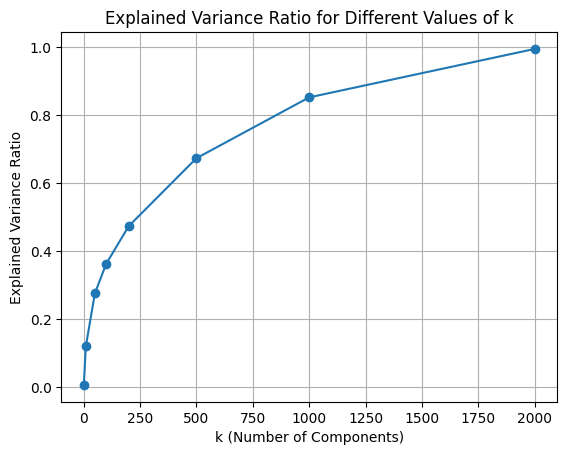

In [ ]:
# svd = TruncatedSVD(n_components=50, random_state=0)
# X_train_reduced = svd.fit_transform(tfidf_train)
# print(tfidf_train.shape)


# List of values for k
ks = [1, 10, 50, 100, 200, 500, 1000, 2000]

expl_vars = []

for k in ks:
    svd = TruncatedSVD(n_components=k,random_state=42)
    svd.fit(tfidf_train)
    expl_vars.append(np.sum(svd.explained_variance_ratio_))

# Plotting the explained variance ratio
plt.plot(ks, expl_vars, marker='o')
plt.title('Explained Variance Ratio for Different Values of k')
plt.xlabel('k (Number of Components)')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()


#### Squared Frobenius norm for LSI

In [ ]:
svd = TruncatedSVD(n_components=50,random_state=42)
X_train_transformed = svd.fit_transform(tfidf_train)
X_test_transformed = svd.transform(tfidf_test)
X_approx = svd.inverse_transform(X_train_transformed)

print(np.sum(np.array(tfidf_train - X_approx)**2))

1946.2258130377645


### NMF
\begin{array}{cc}
\min_\limits{\mathbf{W}, \mathbf{H}} & \lVert\mathbf{X} - \mathbf{W}\mathbf{H}\rVert_F^2 \\
s.t. & \mathbf{W} \ge 0 \\
& \mathbf{H} \ge 0
\end{array}

$\mathbf{X} \in \mathbb{R}^{m\times n}$,

$\mathbf{W} \in \mathbb{R}^{m\times k}$, $\mathbf{H} \in \mathbb{R}^{k\times n}$, $k < \mathrm{rank}(\mathbf{X})$

#### Squared error (NMF, k = 50)

In [ ]:
model = NMF(n_components=50, init='random', random_state=42)
W_train = model.fit_transform(tfidf_train)
H = model.components_
print(H.shape)
np.sum(np.array(tfidf_train - W_train.dot(H))**2)

(50, 14124)


1976.7494100479905

## ANSWER 4

> *• Plot the explained variance ratio across multiple different k = [1, 10, 50, 100, 200, 500, 1000, 2000]
for LSI and for the next few sections choose k = 50. What does the explained variance ratio
plot look like? What does the plot's concavity suggest?*

The plot is as plotted in the above cells. The concavity suggests diminishing returns in terms of explained variance ratio as you add more components, showing that the singular values of the first few components explain most of the variance of the data and the latter portions don't significantly contribute to the variance and hence the rate of increase in explained variance slows down



>*• With k = 50 found in the previous sections, calculate the reconstruction residual MSE error
when using LSI and NMF - they both should use the same k = 50. Which one is larger, the $\lVert \mathbf{X} - \mathbf{W}\mathbf{H}\rVert_F^2$ in NMF or the $\lVert X − U_kΣ_kV^T \rVert_F^2$ in LSI and why?*

| LSI Squared error      | NMF Squared error |    
| :---        |    :----:   |   
| 1946.23    | 1976.75       |


Clearly, the NMF squared error is slightly larger than LSI. This suggests that the NMF factorization is not as effective in capturing the variability of the original matrix compared to  LSI. Could also be owing to NMF enforcing non-negativity constraints on the factorized matrices, which may limit its ability to accurately reconstruct the original matrix in certain cases.




In [ ]:
def plot_roc(fpr, tpr):
    fig, ax = plt.subplots()

    roc_auc = auc(fpr,tpr)

    ax.plot(fpr, tpr, lw=2, label= 'area under curve = %0.4f' % roc_auc)

    ax.grid(color='0.7', linestyle='--', linewidth=1)

    ax.set_xlim([-0.1, 1.1])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate',fontsize=15)
    ax.set_ylabel('True Positive Rate',fontsize=15)

    ax.legend(loc="lower right")

    for label in ax.get_xticklabels()+ax.get_yticklabels():
        label.set_fontsize(15)

def fit_predict_and_plot_roc(pipe, train_data, train_label, test_data, test_label):
    pipe.fit(train_data, train_label)
    # pipeline1.predict(twenty_test.data)

    if hasattr(pipe, 'decision_function'):
        prob_score = pipe.decision_function(test_data)
        fpr, tpr, _ = roc_curve(test_label, prob_score)
    else:
        prob_score = pipe.predict_proba(test_data)
        fpr, tpr, _ = roc_curve(test_label, prob_score[:,1])

    plot_roc(fpr, tpr)
#     return pipe

## Classification Algorithms

### SVM Hard-Margin = 1000

In [ ]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(train["root_label"])
y_test = label_encoder.fit_transform(test["root_label"])

svm_classifier = svm.LinearSVC(C=1000,max_iter=100000,random_state=42)
svm_classifier.fit(X_train_transformed, y)

y_pred = svm_classifier.predict(X_test_transformed)
accuracy = accuracy_score(y_test, y_pred)
precision =precision_score(y_test, y_pred)
recall =recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)



Accuracy: 0.9568965517241379
Precision: 0.9592391304347826
Recall: 0.9592391304347826
F1 score: 0.9592391304347826


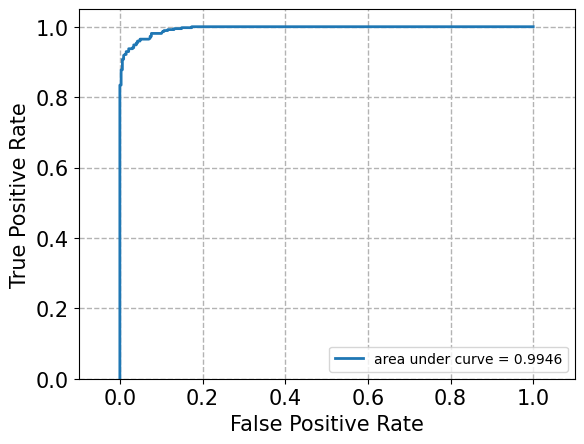

In [ ]:
y_scores = svm_classifier.decision_function(X_test_transformed)
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
plot_roc(fpr, tpr)

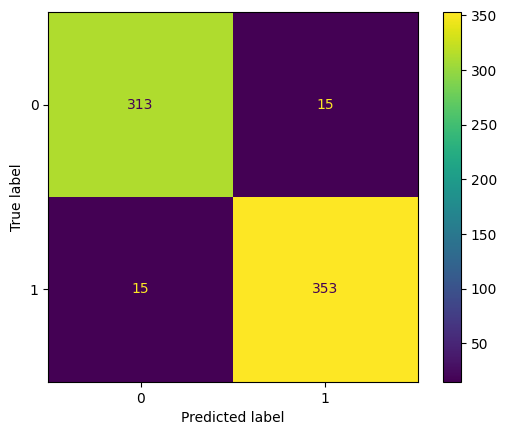

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=svm_classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=svm_classifier.classes_)
disp.plot()
plt.show()

### Soft-Margin = 0.0001

In [ ]:
svm_classifier_soft = svm.LinearSVC(C=0.0001,max_iter=100000,random_state=42)
svm_classifier_soft.fit(X_train_transformed, y)

y_pred = svm_classifier_soft.predict(X_test_transformed)
accuracy = accuracy_score(y_test, y_pred)
precision=precision_score(y_test, y_pred)
recall=recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)


Accuracy: 0.9209770114942529
Precision: 0.9845201238390093
Recall: 0.8641304347826086
F1 score: 0.9204052098408104


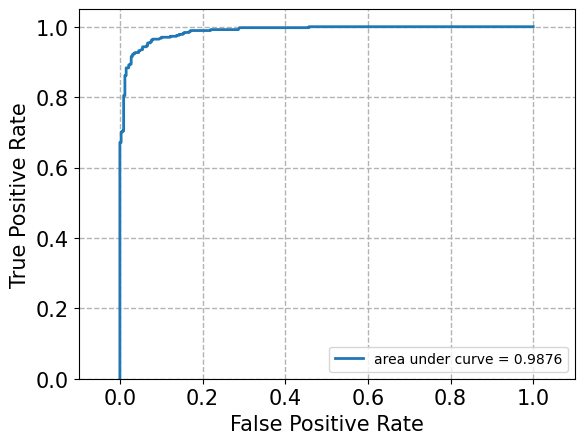

In [ ]:
y_scores = svm_classifier_soft.decision_function(X_test_transformed)
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
plot_roc(fpr, tpr)

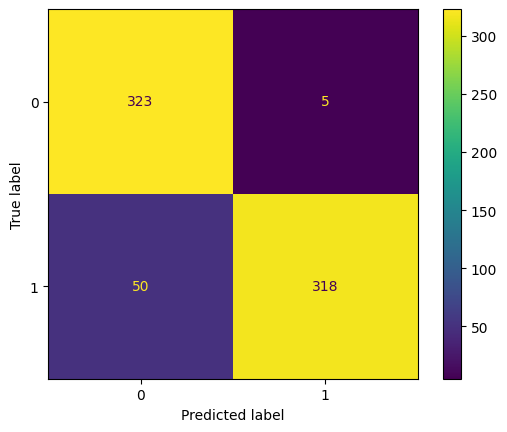

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=svm_classifier_soft.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=svm_classifier_soft.classes_)
disp.plot()
plt.show()

### k-fold cross validation (SVM)

In [ ]:
from sklearn.exceptions import ConvergenceWarning
import warnings

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(train["root_label"])
y_test = label_encoder.fit_transform(test["root_label"])

# Linear SVM with L1 regularization
C_values = [10**k for k in range(-5, 6)]
best_score = -np.inf
best_C_svm = None
for C in C_values:
    linsvm = svm.LinearSVC(C=C, max_iter = 10000,random_state=42)
    scores = cross_val_score(linsvm, X_train_transformed, y, cv=5, scoring='f1_macro')
    average_score = np.mean(scores)
    if average_score > best_score:
        best_score = average_score
        best_C_svm = C

print("k-fold CV results :\n")
print("Best C value:", best_C_svm)

final_svm_classifier = svm.LinearSVC(C=best_C_svm,max_iter = 10000,random_state=42)
final_svm_classifier.fit(X_train_transformed, y)
y_pred = final_svm_classifier.predict(X_test_transformed)
# Ignore LinearSVC convergence warnings
accuracy = accuracy_score(y_test, y_pred)
precision=precision_score(y_test, y_pred)
recall=recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

k-fold CV results :

Best C value: 1
Accuracy: 0.9497126436781609
Precision: 0.9463806970509383
Recall: 0.9592391304347826
F1 score: 0.9527665317139


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


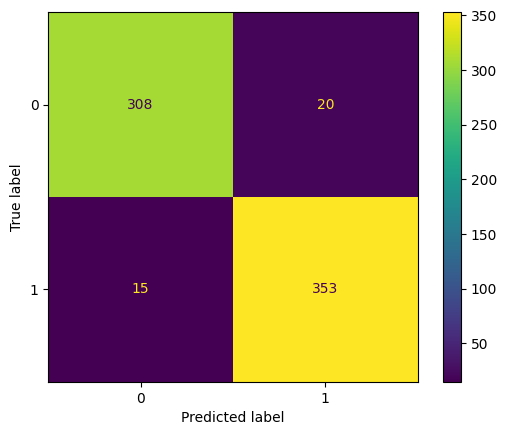

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=final_svm_classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=final_svm_classifier.classes_)
disp.plot()
plt.show()

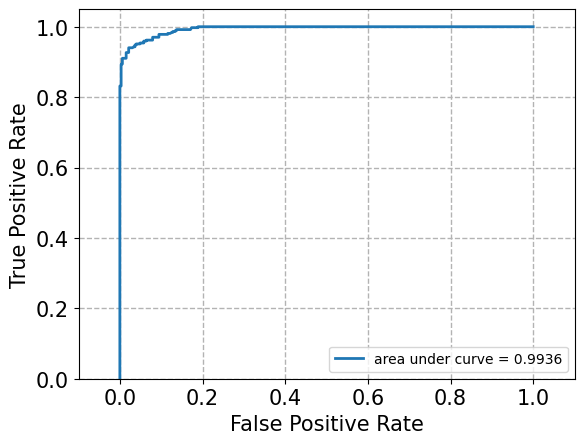

In [ ]:
y_scores = final_svm_classifier.decision_function(X_test_transformed)
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
plot_roc(fpr, tpr)

## ANSWER 5 (SVM)

| Metric    | Value  |
|-----------|--------|
| Accuracy  | 0.9568965517241379   |
| Precision | 0.9617486338797814   |
| Recall    | Recall: 0.9565217391304348   |
| F1 Score  | 0.9591280653950953   |

We obtain best $\gamma=1$ and the plots are as above.

# Logistic Regression

In [ ]:
lr_classifier = LogisticRegression(C=1e10,max_iter=1000,random_state=42,penalty=None)
lr_classifier.fit(X_train_transformed, y)
y_pred = lr_classifier.predict(X_test_transformed)
accuracy = accuracy_score(y_test, y_pred)
precision=precision_score(y_test, y_pred)
recall=recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

Accuracy: 0.9583333333333334
Precision: 0.9618528610354223
Recall: 0.9592391304347826
F1 score: 0.9605442176870749


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


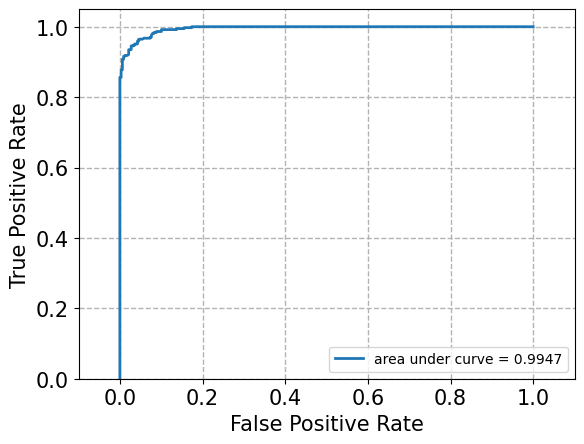

In [ ]:
y_scores = lr_classifier.decision_function(X_test_transformed)
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
plot_roc(fpr, tpr)

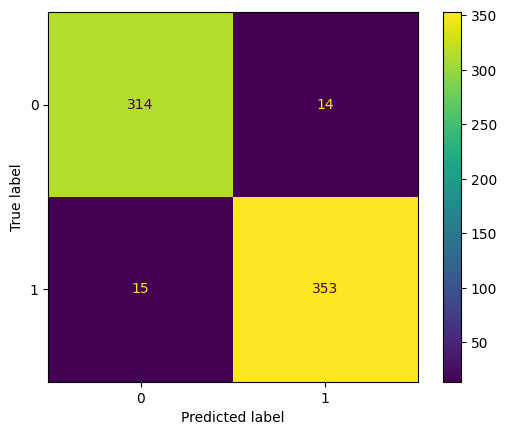

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=lr_classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=lr_classifier.classes_)
disp.plot()
plt.show()

## Logistic Regression L1 (k-fold cv)

In [ ]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(train["root_label"])
y_test = label_encoder.fit_transform(test["root_label"])
C_values = [10**k for k in range(-5, 6)]
best_score_l1 = -np.inf
best_C_l1 = None
for C in C_values:
    logreg_l1 = LogisticRegression(penalty='l1', C=C, solver='liblinear',random_state=42)
    scores = cross_val_score(logreg_l1, X_train_transformed, y, cv=5, scoring='f1_macro')
    average_score = np.mean(scores)
    if average_score > best_score_l1:
        best_score_l1 = average_score
        best_C_l1 = C
print("k-fold CV results :\n")
print("Best C value:", best_C_l1)

lr_classifier_l1 = LogisticRegression(C=best_C_l1,max_iter=1000,penalty='l1',solver = 'liblinear',random_state=42)
lr_classifier_l1.fit(X_train_transformed, y)
y_pred = lr_classifier_l1.predict(X_test_transformed)
accuracy = accuracy_score(y_test, y_pred)
precision=precision_score(y_test, y_pred)
recall=recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)


k-fold CV results :

Best C value: 10
Accuracy: 0.9540229885057471
Precision: 0.9615384615384616
Recall: 0.9510869565217391
F1 score: 0.9562841530054645


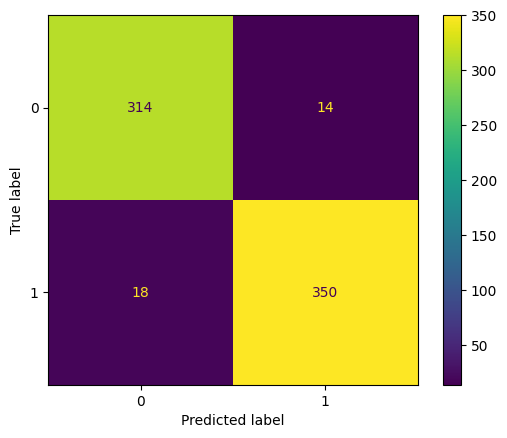

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=lr_classifier_l1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=lr_classifier_l1.classes_)
disp.plot()
plt.show()

## Logistic Regression L2 (k-fold cv)

In [ ]:
best_score_l2 = -np.inf
best_C_l2 = None
for C in C_values:
    logreg_l2 = LogisticRegression(penalty='l2', C=C, solver='liblinear',random_state=42)
    scores = cross_val_score(logreg_l2, X_train_transformed, y, cv=5, scoring='f1_macro')
    average_score = np.mean(scores)
    if average_score > best_score_l2:
        best_score_l2 = average_score
        best_C_l2 = C
lr_classifier_l2 = LogisticRegression(C=best_C_l2,max_iter=1000,penalty='l2',solver = 'liblinear',random_state=42)
lr_classifier_l2.fit(X_train_transformed, y)
y_pred = lr_classifier_l2.predict(X_test_transformed)
accuracy = accuracy_score(y_test, y_pred)
precision=precision_score(y_test, y_pred)
recall=recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Best C:", best_C_l2)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)


Best C: 100
Accuracy: 0.9583333333333334
Precision: 0.9618528610354223
Recall: 0.9592391304347826
F1 score: 0.9605442176870749


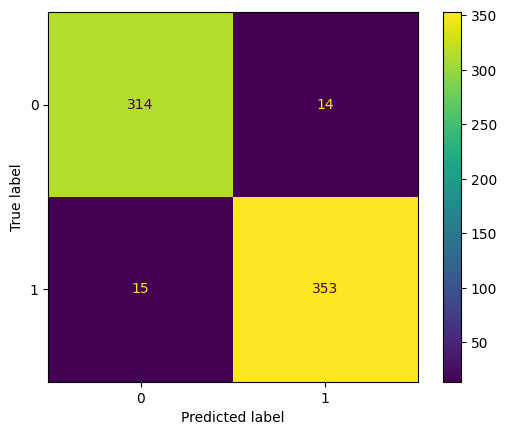

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=lr_classifier_l2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=lr_classifier_l2.classes_)
disp.plot()
plt.show()

## ANSWER 6 (Logistic Regression)

> Comparison of metrics for different choices with optimal regularization coefficient

| Metric    | W/o Reg | L1 Reg (best $\gamma=10$)   | L2 Reg    (best $\gamma=100$)             |
|-----------|---------|----------|---------------------|
| Accuracy  | 0.958   |    0.954       |    0.958            |
| Precision | 0.962   |  0.961        |   0.962             |
| Recall    | 0.959   |  0.951        |   0.959                  |
| F1 Score  | 0.960   |    0.956      |    0.960                 |

 From above table judging from F-scores, L1-Regularization outpeforms both L2 and without regularization regressions.
 Plots as shown as above in the Logistic regression section.

---

> How does the regularization parameter affect the test error? How are the learnt coefficients affected? Why might one be interested in each type of regularization?

**Effect on Test error and learned coefficients:**

When we increase the regularization parameter in L1 regularization, it gets choosier about the features it likes, some features may even be dropped entirely by setting their importance to $0$ making model simpler but we should be careful not to remove too much. This can be useful when dealing with high-dimensional datasets with many irrelevant features, effectively performing feature selection.

For L2 regularization, it tries to control big numbers in our model but it doesn't completely eliminate any features. It's like asking the model to be a bit more careful with all the features, preventing it from getting too carried away. This way, we keep things balanced between simplicity and using all the features. It tends to distribute the penalty across all features, reducing the impact of any single feature on the model.

---

**When L1 and when L2?**

**L1 Regularization:** Useful when you suspect that only a small number of features are important and you want to perform feature selection as discussed above.

**L2 Regularization:** Suitable when you have a large number of features, and you want to prevent overfitting.


> Both logistic regression and linear SVM are trying to classify data points using a linear
decision boundary. What is the difference between their ways to find this boundary? Why
do their performances differ? Is this difference statistically significant?

**Difference in Finding the Decision Boundary:**

**Logistic Regression:** Uses the sigmoid function to map inputs to a probability score and sets a decision boundary based on a threshold.

**Linear SVM:** Finds the hyperplane that maximizes the margin between classes, setting the decision boundary accordingly.

**Performance Differences:**

Reasons for Differences: Depend on factors like data nature, outliers, and decision boundary characteristics. SVM might perform better with a clear margin, while logistic regression might handle outliers more robustly.

Statistical Significance: It varies and needs tests like hypothesis testing or cross-validation to determine significance.

**Considerations:**

Linearity Assumption: Both models assume a linear decision boundary. If the true boundary is highly non-linear, a non-linear model might be more suitable.

Regularization: The amount of regularization impacts the trade-off between fitting the data and avoiding overfitting. Adjusting this can affect performance.


# Naive-Bayes

In [ ]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(train["root_label"])
y_test = label_encoder.fit_transform(test["root_label"])

naivebayes = GaussianNB()
naivebayes = naivebayes.fit(X_train_transformed, y)
y_pred = naivebayes.predict(X_test_transformed)
accuracy = accuracy_score(y_test, y_pred)
precision=precision_score(y_test, y_pred)
recall=recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)


Accuracy: 0.8908045977011494
Precision: 0.8411214953271028
Recall: 0.9782608695652174
F1 score: 0.9045226130653266


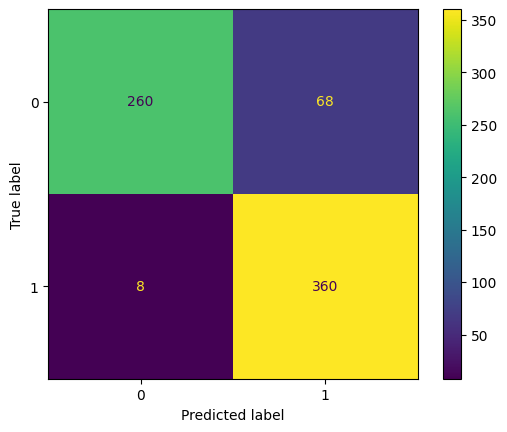

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=naivebayes.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=naivebayes.classes_)
disp.plot()
plt.show()

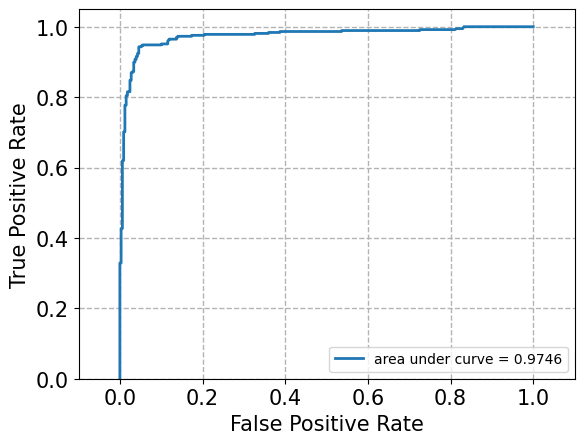

In [ ]:
y_scores = naivebayes.predict_proba(X_test_transformed)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
plot_roc(fpr, tpr)

## ANSWER-7 (GaussianNB)


| Metric    | Value  |
|-----------|--------|
| Accuracy  | 0.905  |
| Precision | 0.866   |
| Recall    |0.970  |
| F1 Score  | 0.915   |

ROC and Confusion matrix are as above plotted


# Pipeline gridsearch

In [ ]:

stop_words = stopwords.words("english")
wnl = nltk.wordnet.WordNetLemmatizer()
stemmer = PorterStemmer()
def penn2morphy(penntag):
    morphy_tag = {'NN':'n', 'JJ':'a', 'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n'

def lemmatize_tokenizer(text):
    # return [wnl.lemmatize(word.lower(), pos=penn2morphy(tag))
    #         for word, tag in pos_tag(nltk.word_tokenize(text))]
    return [
        wnl.lemmatize(word.lower(), pos=penn2morphy(tag))
        for word, tag in pos_tag(nltk.word_tokenize(text))
        if word.lower() not in stop_words
    ]
def stem_tokens(text):
  # tokens = [stemmer.stem(word) for word in nltk.word_tokenize(text)]
  # return tokens

      return [
        stemmer.stem(word.lower())
        for word in nltk.word_tokenize(text)
        if word.lower() not in stop_words]




In [ ]:
from tempfile import mkdtemp
from shutil import rmtree
from joblib import Memory
cachedir = mkdtemp()
memory = Memory(location=cachedir, verbose=0)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(train["root_label"])
y_test = label_encoder.fit_transform(test["root_label"])

pipeline = Pipeline([
    ('feature_extract', CountVectorizer(min_df = 3,token_pattern=None)),  # min_df setting
    ('tfidf', TfidfTransformer()),  #TF-IDF matrix
    ('dim_reduction', 'passthrough'),  # Dimensionality reduction (default is LSI)
    ('classifier', 'passthrough'),  # Classifier (default is LinearSVC)
],memory=memory)


param_grid = {
    'feature_extract__min_df': [3, 5],
    'feature_extract__tokenizer':[lemmatize_tokenizer,stem_tokens],
    'dim_reduction': [TruncatedSVD(random_state=42), NMF(random_state=42)],
    'dim_reduction__n_components': [5, 30, 80],
    'classifier': [svm.LinearSVC(C=best_C_svm, max_iter=1000,random_state=42),
                               LogisticRegression(C=best_C_l1, penalty='l1', max_iter=1000, solver='liblinear',random_state=42),
                               LogisticRegression(C=best_C_l2, penalty='l2', max_iter=1000, solver='liblinear',random_state=42),
                               GaussianNB()]
}



# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy',  verbose=10)
grid_search.fit(train["full_text"], y)
rmtree(cachedir)
# Print the best parameters and the corresponding accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)



## Grid search best parameters

In [ ]:
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)
# Print the top 3 scores and corresponding parameters
results = grid_search.cv_results_
top_5_indices = results['rank_test_score'][:3]

print("Top 3 Grid Search Scores:")
for index in top_5_indices:
    print(f"Rank: {results['rank_test_score'][index]}, "
          f"Score: {results['mean_test_score'][index]:.4f}, "
          f"Parameters: {results['params'][index]}")

Best Parameters: {'classifier': LinearSVC(C=1, random_state=42), 'dim_reduction': TruncatedSVD(n_components=80, random_state=42), 'dim_reduction__n_components': 80, 'feature_extract__min_df': 3, 'feature_extract__tokenizer': <function lemmatize_tokenizer at 0x7bb1b35371c0>}
Best Accuracy: 0.960431654676259
Top 3 Grid Search Scores:
Rank: 39, Score: 0.9507, Parameters: {'classifier': LogisticRegression(C=1000, max_iter=1000, random_state=42, solver='liblinear'), 'dim_reduction': NMF(random_state=42), 'dim_reduction__n_components': 30, 'feature_extract__min_df': 3, 'feature_extract__tokenizer': <function lemmatize_tokenizer at 0x7bb1b35371c0>}
Rank: 24, Score: 0.9532, Parameters: {'classifier': LogisticRegression(C=1000, max_iter=1000, random_state=42, solver='liblinear'), 'dim_reduction': NMF(random_state=42), 'dim_reduction__n_components': 80, 'feature_extract__min_df': 5, 'feature_extract__tokenizer': <function lemmatize_tokenizer at 0x7bb1b35371c0>}
Rank: 16, Score: 0.9554, Parameter

Accuracy: 0.9554597701149425
Precision: 0.9566395663956639
Recall: 0.9592391304347826
F1 score: 0.9579375848032565


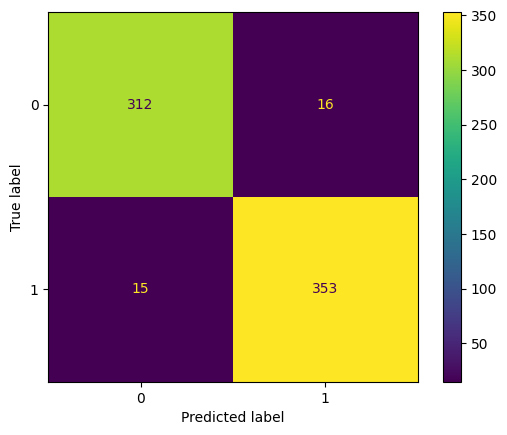

In [ ]:

svd = TruncatedSVD(n_components=80,random_state=42)
X_train_transformed = svd.fit_transform(tfidf_train)  #used lemmatizer here already
X_test_transformed = svd.transform(tfidf_test)



final_svm_classifier = svm.LinearSVC(C=1,max_iter = 10000,random_state=42)
final_svm_classifier.fit(X_train_transformed, y)
y_pred = final_svm_classifier.predict(X_test_transformed)
# Ignore LinearSVC convergence warnings
accuracy = accuracy_score(y_test, y_pred)
precision=precision_score(y_test, y_pred)
recall=recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)


cm = confusion_matrix(y_test, y_pred, labels=final_svm_classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=final_svm_classifier.classes_)
disp.plot()
plt.show()

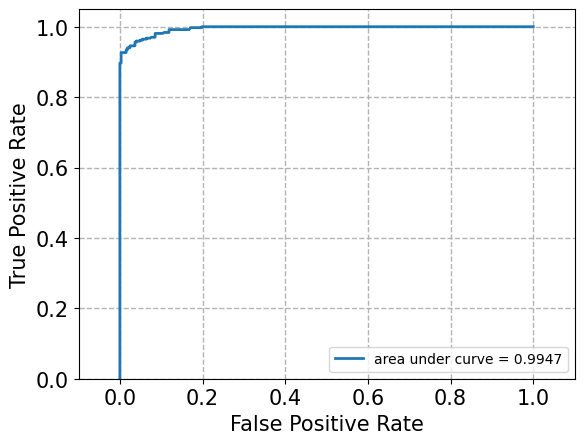

In [ ]:
y_scores = final_svm_classifier.decision_function(X_test_transformed)
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
plot_roc(fpr, tpr)

## ANSWER-8 (Grid Search results)

| Modules             | Options                                                                                               |
|----------------------|-------------------------------------------------------------------------------------------------------|
| Loading Data         | Cleaning the data (using cleaner previously implemented)                                                                                        |
| Feature Extraction   | - min_df = [3,5] while constructing the vocabulary<br>- Lemmatization vs Stemming as a compression module <br> - TF-IDF |
| Dimensionality Reduction | - LSI (k = [5, 30, 80]) vs NMF (k = [5, 30, 80])                                                       |
| Classifier           | - SVM with the best γ previously found<br>- Logistic Regression: L1 regularization vs L2 regularization, with the best regularization strength previously found<br>- GaussianNB<br>  |
                                                                                     |

---

**Gridsearch results**



|  Module             | Best result                                                                                               |
|----------------------|-------------------------------------------------------------------------------------------------------|
| Feature Extraction   | `min_df` = 3 while constructing the vocabulary<br> `Lemmatization` as a compression module <br>  |
| Dimensionality Reduction |  `LSI` (k =80)                |
| Classifier           |  `SVM` with the best γ previously found |


Scores are reported above



# Multiclass classification

## ANSWER 9

In [ ]:
map_class_to_row = {"basketball": 0, "baseball": 1, "tennis": 2, "football": 3, "soccer": 4,
                    "forest fire": 5, "flood": 6, "earthquake": 7, "drought": 8, "heatwave": 9}

df['leaf_label_enc'] = df['leaf_label'].map(map_class_to_row)

train, test = train_test_split(df[['full_text', 'leaf_label','leaf_label_enc']], test_size=0.2, random_state=42)
train["full_text"] = train["full_text"].map(clean)
test["full_text"]= test["full_text"].map(clean)
tfidf_train_mc, tfidf_test_mc, vectorizer = text_vectorization(train["full_text"],test["full_text"],min_df=3)
model = NMF(n_components=50, init='random', random_state=42)
W_train = model.fit_transform(tfidf_train_mc)
H = model.components_
X_train_transformed_mc = W_train@H
X_test_transformed_mc = model.transform(tfidf_test_mc)@H


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Accuracy: 0.7456896551724138
Precision: 0.7735148621801683
Recall: 0.7456896551724138
F1 score: 0.7465299737967295


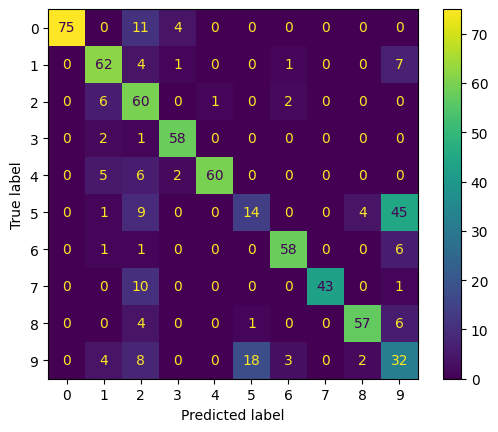

In [ ]:
# Multiclass SVM with One-vs-One


svm_classifier = svm.SVC(kernel='linear',decision_function_shape='ovo',random_state = 42)
svm_ovo_classifier = OneVsOneClassifier(svm_classifier)
svm_ovo_classifier.fit(X_train_transformed_mc, train["leaf_label_enc"])
svm_ovo_predictions = svm_ovo_classifier.predict(X_test_transformed_mc)

# Evaluate SVM with One-vs-One
svm_ovo_conf_matrix = confusion_matrix(test["leaf_label_enc"], svm_ovo_predictions)
svm_ovo_accuracy = accuracy_score(test["leaf_label_enc"], svm_ovo_predictions)
svm_ovo_recall = recall_score(test["leaf_label_enc"], svm_ovo_predictions, average='weighted')
svm_ovo_precision = precision_score(test["leaf_label_enc"], svm_ovo_predictions, average='weighted')
svm_ovo_f1 = f1_score(test["leaf_label_enc"], svm_ovo_predictions, average='weighted')

print("Accuracy:", svm_ovo_accuracy)
print("Precision:", svm_ovo_precision)
print("Recall:", svm_ovo_recall)
print("F1 score:", svm_ovo_f1)

cm = confusion_matrix(test["leaf_label_enc"], svm_ovo_predictions, labels=svm_ovo_classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=svm_ovo_classifier.classes_)
disp.plot()
plt.show()


Accuracy: 0.7672413793103449
Precision: 0.7391975391625856
Recall: 0.7672413793103449
F1 score: 0.7473420488635526


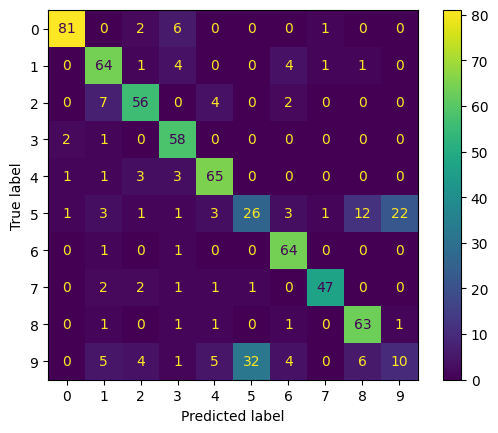

In [ ]:
# Multiclass SVM with One-vs-the-Rest

svm_classifier = svm.SVC(kernel='linear',decision_function_shape='ovr',random_state=42)
svm_ovr_classifier = OneVsRestClassifier(svm_classifier)
svm_ovr_classifier.fit(X_train_transformed_mc, train["leaf_label_enc"])
svm_ovr_predictions = svm_ovr_classifier.predict(X_test_transformed_mc)

svm_ovr_conf_matrix = confusion_matrix(test["leaf_label_enc"], svm_ovr_predictions)
svm_ovr_accuracy = accuracy_score(test["leaf_label_enc"], svm_ovr_predictions)
svm_ovr_recall = recall_score(test["leaf_label_enc"], svm_ovr_predictions, average='weighted')
svm_ovr_precision = precision_score(test["leaf_label_enc"], svm_ovr_predictions, average='weighted')
svm_ovr_f1 = f1_score(test["leaf_label_enc"], svm_ovr_predictions, average='weighted')

print("Accuracy:", svm_ovr_accuracy)
print("Precision:", svm_ovr_precision)
print("Recall:", svm_ovr_recall)
print("F1 score:", svm_ovr_f1)

cm = confusion_matrix(test["leaf_label_enc"], svm_ovr_predictions, labels=svm_ovr_classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=svm_ovr_classifier.classes_)
disp.plot()
plt.show()


Accuracy: 0.728448275862069
Precision: 0.7141416183961206
Recall: 0.728448275862069
F1 score: 0.7175569079689195


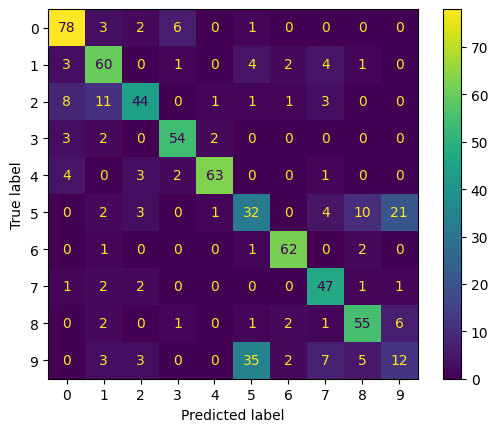

In [ ]:
# Naive Bayes classification
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_transformed_mc, train["leaf_label_enc"])
nb_predictions = nb_classifier.predict(X_test_transformed_mc)

# Evaluate Naive Bayes
nb_conf_matrix = confusion_matrix(test["leaf_label_enc"], nb_predictions)
nb_accuracy = accuracy_score(test["leaf_label_enc"], nb_predictions)
nb_recall = recall_score(test["leaf_label_enc"], nb_predictions, average='weighted')
nb_precision = precision_score(test["leaf_label_enc"], nb_predictions, average='weighted')
nb_f1 = f1_score(test["leaf_label_enc"], nb_predictions, average='weighted')

print("Accuracy:", nb_accuracy)
print("Precision:", nb_precision)
print("Recall:", nb_recall)
print("F1 score:", nb_f1)

cm = confusion_matrix(test["leaf_label_enc"], nb_predictions, labels=nb_classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=nb_classifier.classes_)
disp.plot()
plt.show()


Accuracy: 0.764367816091954
Precision: 0.7781586681326934
Recall: 0.764367816091954
F1 score: 0.7672261478994719


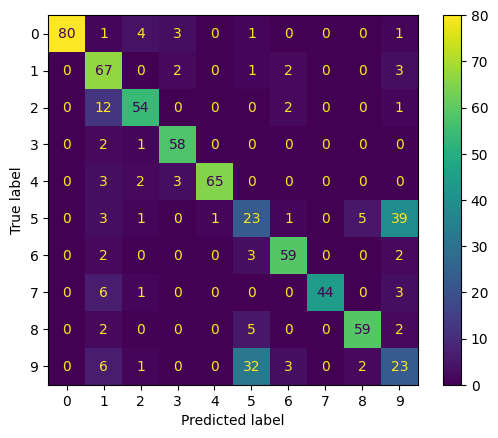

In [ ]:
svm_classifier = svm.SVC(kernel='linear',decision_function_shape='ovr',random_state=42,class_weight='balanced')
svm_ovr_classifier = OneVsRestClassifier(svm_classifier)
svm_ovr_classifier.fit(X_train_transformed_mc, train["leaf_label_enc"])
svm_ovr_predictions = svm_ovr_classifier.predict(X_test_transformed_mc)

svm_ovr_conf_matrix = confusion_matrix(test["leaf_label_enc"], svm_ovr_predictions)
svm_ovr_accuracy = accuracy_score(test["leaf_label_enc"], svm_ovr_predictions)
svm_ovr_recall = recall_score(test["leaf_label_enc"], svm_ovr_predictions, average='weighted')
svm_ovr_precision = precision_score(test["leaf_label_enc"], svm_ovr_predictions, average='weighted')
svm_ovr_f1 = f1_score(test["leaf_label_enc"], svm_ovr_predictions, average='weighted')

print("Accuracy:", svm_ovr_accuracy)
print("Precision:", svm_ovr_precision)
print("Recall:", svm_ovr_recall)
print("F1 score:", svm_ovr_f1)

cm = confusion_matrix(test["leaf_label_enc"], svm_ovr_predictions, labels=svm_ovr_classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=svm_ovr_classifier.classes_)
disp.plot()
plt.show()


In the above, I have already used class-weight = 'balanced' which takes care of assigning weights to classes inversely proportional to its frequency.

| Metric    | SVM (OneVsOne) | SVM (OneVsRest)   | Gaussian Naive-Bayes            |
|-----------|---------|----------|---------------------|
| Accuracy  |0.745   |    0.767      |    0.728          |
| Precision | 0.773   | 0.739        | 0.714            |
| Recall    |0.745   | 0.767       |   0.728                |
| F1 Score  |0.746  |   0.747     |    0.717                 |

For SVM (OneVsRest), I use class-weighting to tackle the class-imbalance issue.

## Merging labels

We observe from the confusion matrices of OvO, OvR SVMs and Gaussian NB models that labels 5 and 9 (forest fire and heatwave) are getting misclassified as one another and this is understandable since news-reports involving forest-fires often have a lot of correlation to heatwaves, and thus makes it harder for models to learn a strict linear boundary separating both  the classes.

To tackle this, we merge '5' and '9' labels  into one single label '5' and train classifiers using this.

---

Regarding class imbalance, we use a **Random Undersampler**  which under-samples the majority class(es) by randomly picking samples with or without replacement.

############# OneVsOne SVM #############
 
Accuracy: 0.8362068965517241
Precision: 0.8659169105011643
Recall: 0.8362068965517241
F1 score: 0.8436674403279045


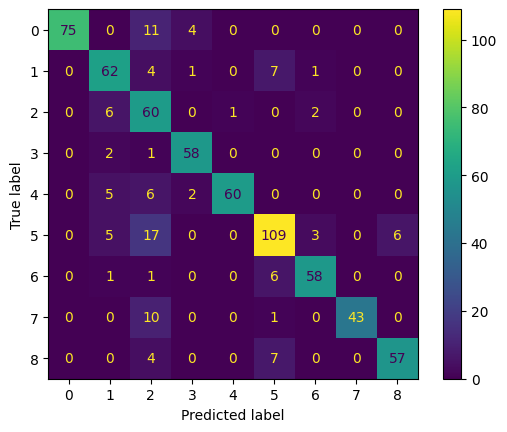

In [ ]:
## Without ROS

merged_labels = test["leaf_label_enc"].copy()
merged_labels[(test["leaf_label_enc"] == 5) | (test["leaf_label_enc"] == 9)] = 5

original_predictions = svm_ovo_classifier.predict(X_test_transformed_mc)
merged_predictions = original_predictions.copy()
merged_predictions[(original_predictions == 5) | (original_predictions == 9)] = 5

svm_ovo_matrix = confusion_matrix(merged_labels, merged_predictions)
svm_ovo_accuracy = accuracy_score(merged_labels, merged_predictions)
svm_ovo_recall = recall_score(merged_labels, merged_predictions, average='weighted')
svm_ovo_precision = precision_score(merged_labels, merged_predictions, average='weighted')
svm_ovo_f1 = f1_score(merged_labels, merged_predictions, average='weighted')

print("############# OneVsOne SVM #############\n ")
print("Accuracy:", svm_ovo_accuracy)
print("Precision:", svm_ovo_precision)
print("Recall:", svm_ovo_recall)
print("F1 score:", svm_ovo_f1)

disp = ConfusionMatrixDisplay(confusion_matrix=svm_ovo_matrix)
disp.plot()
plt.show()



############# OneVsRest SVM #############
 
Accuracy: 0.8663793103448276
Precision: 0.8804383133390317
Recall: 0.8663793103448276
F1 score: 0.8695650350790806


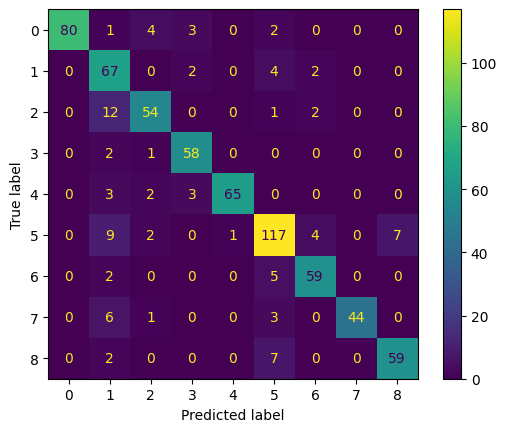

In [ ]:

merged_labels = test["leaf_label_enc"].copy()
merged_labels[(test["leaf_label_enc"] == 5) | (test["leaf_label_enc"] == 9)] = 5

original_predictions = svm_ovr_classifier.predict(X_test_transformed_mc)
merged_predictions = original_predictions.copy()
merged_predictions[(original_predictions == 5) | (original_predictions == 9)] = 5

svm_ovr_matrix = confusion_matrix(merged_labels, merged_predictions)
svm_ovr_accuracy = accuracy_score(merged_labels, merged_predictions)
svm_ovr_recall = recall_score(merged_labels, merged_predictions, average='weighted')
svm_ovr_precision = precision_score(merged_labels, merged_predictions, average='weighted')
svm_ovr_f1 = f1_score(merged_labels, merged_predictions, average='weighted')

print("############# OneVsRest SVM #############\n ")
print("Accuracy:", svm_ovr_accuracy)
print("Precision:", svm_ovr_precision)
print("Recall:", svm_ovr_recall)
print("F1 score:", svm_ovr_f1)

disp = ConfusionMatrixDisplay(confusion_matrix=svm_ovr_matrix)
disp.plot()
plt.show()



### With Random Undersampling

In [ ]:
# Apply Random Under-Sampling
from imblearn.under_sampling import RandomUnderSampler

############# OneVsOne SVM (With Random UnderSampling)#############
 
Accuracy: 0.8433908045977011
Precision: 0.8763548855492647
Recall: 0.8433908045977011
F1 score: 0.8513963445147629


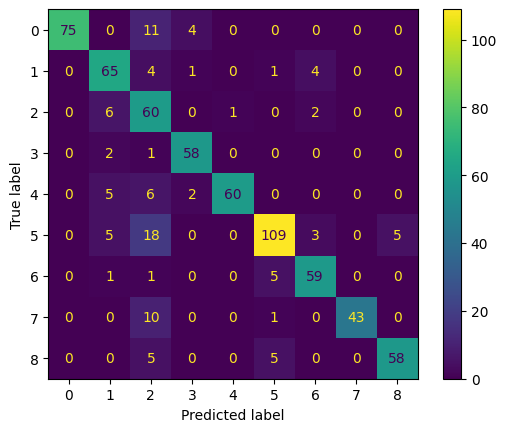

In [ ]:
rus = RandomUnderSampler(sampling_strategy='majority', random_state=42)
y_train = train["leaf_label_enc"].copy()
y_train[(train["leaf_label_enc"] == 5) | (train["leaf_label_enc"] == 9)] = 5

X_train_rus, y_train_rus = rus.fit_resample(X_train_transformed_mc, y_train)


svm_classifier = svm.SVC(kernel='linear',decision_function_shape='ovo',random_state = 42)
svm_ovo_classifier = OneVsOneClassifier(svm_classifier)
svm_ovo_classifier.fit(X_train_rus, y_train_rus)
merged_predictions = svm_ovo_classifier.predict(X_test_transformed_mc)


svm_ovo_matrix = confusion_matrix(merged_labels, merged_predictions)
svm_ovo_accuracy = accuracy_score(merged_labels, merged_predictions)
svm_ovo_recall = recall_score(merged_labels, merged_predictions, average='weighted')
svm_ovo_precision = precision_score(merged_labels, merged_predictions, average='weighted')
svm_ovo_f1 = f1_score(merged_labels, merged_predictions, average='weighted')

print("############# OneVsOne SVM (With Random UnderSampling)#############\n ")
print("Accuracy:", svm_ovo_accuracy)
print("Precision:", svm_ovo_precision)
print("Recall:", svm_ovo_recall)
print("F1 score:", svm_ovo_f1)

disp = ConfusionMatrixDisplay(confusion_matrix=svm_ovo_matrix)
disp.plot()
plt.show()




############# OneVsRest SVM (With Random UnderSampling)#############
 
Accuracy: 0.8635057471264368
Precision: 0.8680711711700588
Recall: 0.8635057471264368
F1 score: 0.863391201383272


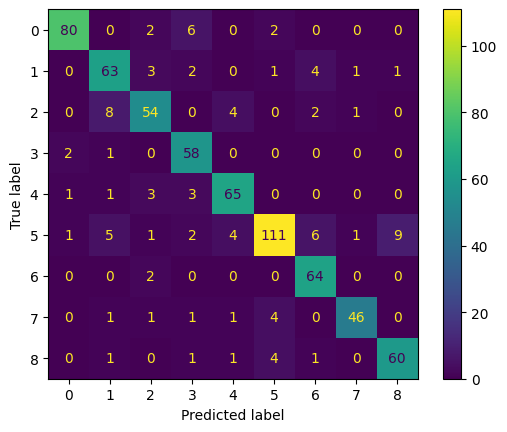

In [ ]:

svm_classifier = svm.SVC(kernel='linear',decision_function_shape='ovr',random_state = 42)
svm_ovr_classifier = OneVsRestClassifier(svm_classifier)
svm_ovr_classifier.fit(X_train_rus, y_train_rus)
merged_predictions = svm_ovr_classifier.predict(X_test_transformed_mc)


svm_ovr_matrix = confusion_matrix(merged_labels, merged_predictions)
svm_ovr_accuracy = accuracy_score(merged_labels, merged_predictions)
svm_ovr_recall = recall_score(merged_labels, merged_predictions, average='weighted')
svm_ovr_precision = precision_score(merged_labels, merged_predictions, average='weighted')
svm_ovr_f1 = f1_score(merged_labels, merged_predictions, average='weighted')

print("############# OneVsRest SVM (With Random UnderSampling)#############\n ")
print("Accuracy:", svm_ovr_accuracy)
print("Precision:", svm_ovr_precision)
print("Recall:", svm_ovr_recall)
print("F1 score:", svm_ovr_f1)

disp = ConfusionMatrixDisplay(confusion_matrix=svm_ovr_matrix)
disp.plot()
plt.show()


## ANSWER 9 (continued)
Without merging labels numbers (from previous table):

| Metric    | SVM (OneVsOne) | SVM (OneVsRest)   | Gaussian Naive-Bayes            |
|-----------|---------|----------|---------------------|
| Accuracy  |0.745   |    0.767      |    0.728          |
| Precision | 0.773   | 0.739        | 0.714            |
| Recall    |0.745   | 0.767       |   0.728                |
| F1 Score  |0.746  |   0.747     |    0.717                 |



Merged labels new numbers (OvOa and OvR):

| Metric    | SVM (OneVsOne) | SVM (OneVsRest)   |
|-----------|---------|----------|
| Accuracy  | 0.836   |    0.866      |
| Precision | 0.865  |0.880        |
| Recall    |0.836   | 0.866       |
| F1 Score  |0.843  |   0.869    |


We note that accuracy increases by ~10% when we merge labels in case of both OneVsOne and OneVsRest.

**Random Undersampler results** (to tackle class-imbalance after merging labels)

| Metric    | SVM (OneVsOne) | SVM (OneVsRest)   |
|-----------|---------|----------|
| Accuracy  |  0.843   | 0.863     |
| Precision |0.876  |0.868        |
| Recall    |0.843   | 0.863       |
| F1 Score  |0.851  |   0.863   |

We note that using RUS gives small performance boosts in terms for OnevOne but it is not the case for OneVsRest.

All plots are as shown in above cells

# Text embeddings

## ANSWER 10

>(a) Why are GLoVE embeddings trained on the ratio of co-occurrence probabilities rather than
the probabilities themselves?

GLoVE embeddings are trained on the ratio of co-occurrence probabilities to capture the semantic relationships between words. This ratio helps in emphasizing the meaningful associations between words while taking care of the impact of the overall frequency of occurrence. By focusing on the ratio, GLoVE can emphasize the co-occurrence relationships that are informative for understanding word semantics. For example "cat-runs" , "dog-plays"  have higher co-occurence probabilities owing to their semantic relationship.

> (b) In the two sentences: “James is running in the park.” and “James is running for the
presidency.”, would GLoVE embeddings return the same vector for the word running in both
cases? Why or why not?

Yes, it would return the *same* vector for both instances of "running".
GLoVE embeddings are static. This means that they do not capture the context of the sentence, and each word is directly mapped to one vector (based on global co-occurrence pattenrs in the corpus its trained on).

> (c) What do you expect for the values of,
$||GLoVE["woman"] - GLoVE["man"]||_2,

> ||GLoVE["wife"] - GLoVE["husband"]||_2$

> and


> $||GLoVE["wife"] - GLoVE["orange"]||_2$ ?

> Compare these values.

 Glove(woman)-Glove(man) $\approx$Glove(wife)-Glove(husband)

 since gender relationship semantics are similar.

Glove(wife)-Glove(orange) $\not\approx$ Glove(woman)-Glove(man)

as "wife" and "orange" are semantically unrelated.


> (d) Given a word, would you rather stem or lemmatize the word before mapping it to its GLoVE
embedding?

It's better to lemmatize words before mapping them through GloVE. Lemmatization provides a more accurate representation of a word's meaning compared to stemming, capturing the essential semantics for GLoVE embeddings.


## ANSWER 11

We choose LinearSVC with hyperparameters as fetched from the GridSearch results. Plots and results are below in the cell outputs

In [ ]:
def load_glove_embeddings(file_path):
    embeddings = {}
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            embeddings[word] = vector
    return embeddings

def get_glove_embedding_with_keywords(text, keywords, glove_embeddings, dimension_limit, keyword_weight=2.0):
    embeddings = [glove_embeddings[word] for word in text.split() if word in glove_embeddings]

    for keyword in keywords:
        if keyword in glove_embeddings:
            embeddings.append(keyword_weight * glove_embeddings[keyword])

    if not embeddings:
        return np.zeros(dimension_limit)

    embeddings = np.array(embeddings)
    embeddings /= np.linalg.norm(embeddings, axis=1, keepdims=True)

    return np.mean(embeddings, axis=0)[:dimension_limit]

glove_file_path = 'glove.6B.300d.txt'
glove_embeddings = load_glove_embeddings(glove_file_path)

train['glove_features'] = train.apply(lambda row: get_glove_embedding_with_keywords(row['full_text'], row['keywords'], glove_embeddings, dimension_limit=300), axis=1)
test['glove_features'] = test.apply(lambda row: get_glove_embedding_with_keywords(row['full_text'], row['keywords'], glove_embeddings, dimension_limit=300), axis=1)

X_train = np.vstack(train['glove_features'])
X_test=  np.vstack(test['glove_features'])
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train["root_label"])
y_test = label_encoder.fit_transform(test["root_label"])
final_svm_classifier = svm.LinearSVC(C=100,max_iter = 10000)
final_svm_classifier.fit(X_train, y_train)
y_pred = final_svm_classifier.predict(X_test)
# Ignore LinearSVC convergence warnings
accuracy = accuracy_score(y_test, y_pred)
precision=precision_score(y_test, y_pred)
recall=recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)



Accuracy: 0.9583333333333334
Precision: 0.9643835616438357
Recall: 0.9565217391304348
F1 score: 0.9604365620736699


Processing: 100%|██████████| 4/4 [01:43<00:00, 26.00s/it]


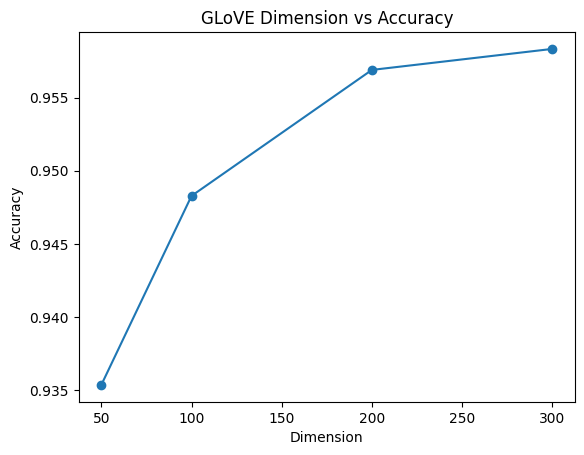

In [ ]:
glove_files = ['glove.6B.50d.txt', 'glove.6B.100d.txt', 'glove.6B.200d.txt', 'glove.6B.300d.txt']
dimensions = [50, 100, 200, 300]
accuracies = []

for glove_file, dimension in tqdm(zip(glove_files, dimensions), total=len(glove_files), desc='Processing'):
    glove_embeddings = load_glove_embeddings(glove_file)
    train['glove_features'] = train.apply(lambda row: get_glove_embedding_with_keywords(row['full_text'], row['keywords'], glove_embeddings, dimension_limit=300), axis=1)
    test['glove_features'] = test.apply(lambda row: get_glove_embedding_with_keywords(row['full_text'], row['keywords'], glove_embeddings, dimension_limit=300), axis=1)

    X_train = np.vstack(train['glove_features'])
    X_test=  np.vstack(test['glove_features'])
    final_svm_classifier = svm.LinearSVC(C=100,max_iter = 10000)
    final_svm_classifier.fit(X_train, y_train)
    y_pred = final_svm_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
# Plot the relationship between the dimension of GLoVE vectors and accuracy
plt.plot(dimensions, accuracies, marker='o')
plt.title('GLoVE Dimension vs Accuracy')
plt.xlabel('Dimension')
plt.ylabel('Accuracy')
plt.show()

## ANSWER 12

We note that the plot is concave in nature since increasing dimensions initially contributes to a steeper, more detailed representations of words. But as we increase the dimension we note that it plateaus since the level of detail doesn't contribute to similar returns in terms of easiness required for the classifier to identfiy the optimal separating hyperplanes between the two classes and hence the rate of accuracy improvement returns are lesser as we increase dimension.


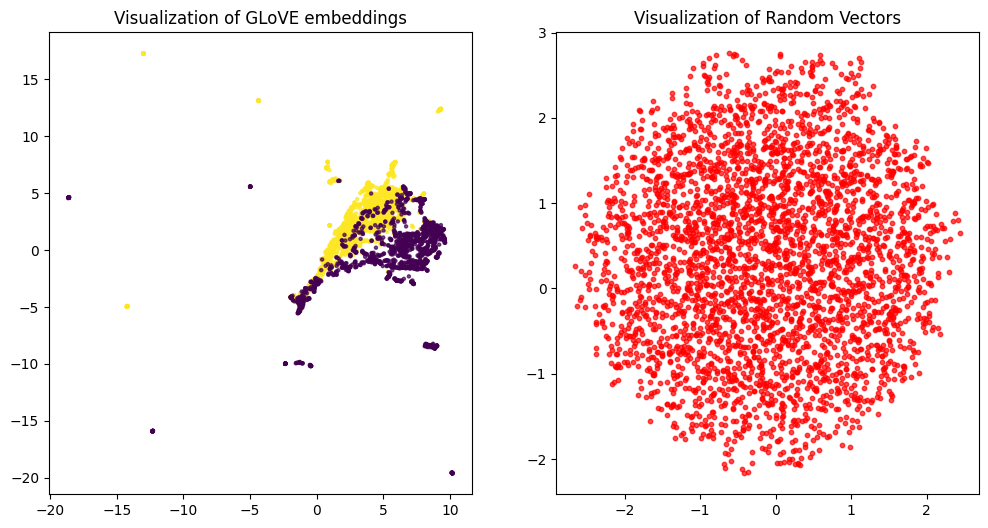

In [ ]:
# Function to create random vectors
def generate_random_vectors(num_vectors, dimension):
    return np.random.randn(num_vectors, dimension)

# Example: Load GLoVE embeddings from file
glove_file = 'glove.6B.300d.txt'
glove_embeddings = load_glove_embeddings(glove_file)
label_encoder = LabelEncoder()
df['encoded_labels'] = label_encoder.fit_transform(df['root_label'])

# Example: Assume you have a DataFrame 'data' with 'full_text' and 'binary_target_column'
# Replace these with your actual data and labels
df['glove_features'] = df.apply(lambda row: get_glove_embedding_with_keywords(row['full_text'], row['keywords'], glove_embeddings, dimension_limit=300), axis=1)

# Example: Visualize GLoVE-based embeddings using UMAP
umap_model = umap.UMAP()
umap_embeddings = umap_model.fit_transform(np.vstack(df['glove_features']))

# Example: Visualize random vectors using UMAP
random_vectors = generate_random_vectors(len(df), 300)
umap_random_vectors = umap_model.fit_transform(random_vectors)

# #Plot GLoVE-based embeddings with labels
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1], c=df['encoded_labels'], alpha=0.7,s=5)
plt.title('Visualization of GLoVE embeddings')
# Plot random vectors
plt.subplot(1, 2, 2)
plt.scatter(umap_random_vectors[:, 0], umap_random_vectors[:, 1], color='red', alpha=0.7,s=10  )
plt.title('Visualization of Random Vectors')

plt.show()

## ANSWER 13


**First plot:**
There are clearly two visible clusters (yellow and purple) formed on plotting the GLoVE embeddings which indicate that the semantic relationhips between intra-sports and intra-climate newsreports are similar and hence the vectors cohesively belong to their respective clusters, whereas inter-class vector distance is far apart which is expected owing to GLoVE's ability to capture meaningful relationships within the data.

**Second plot:** Clearly, there are no semantic relationships between the word embeddings since they are randomly sampled and hence have no semantic relationship which GLoVE can capture.

